In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/refs/heads/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
#checking the Total No of Rows and Columns
df.shape

(614, 13)

In [5]:
#checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Fill null values Using mean method in contineous data 
for i in df.columns:
    if df.dtypes[i]=="float64":
        df[i]=df[i].fillna(df[i].mean())

In [8]:
#again checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Remove Null values using mode method for categorical data
for i in df.columns:
    if df.dtypes[i]=="object":
        df[i]=df[i].fillna(df[i].mode()[0])

In [10]:
#again checking null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#checking for duplicated value
df.duplicated().sum()

0

In [12]:
"""We can see No Null And Duplicated values in dataset."""

'We can see No Null And Duplicated values in dataset.'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
"'In this dataset 3 types of data are present float64,int64 and object with memory usage.'"

"'In this dataset 3 types of data are present float64,int64 and object with memory usage.'"

In [15]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


Gender
Male      502
Female    112
Name: count, dtype: int64


Married
Yes    401
No     213
Name: count, dtype: int64


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     532
Yes     82
Name: count, dtype: int64


ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000   

In [16]:
#checking no of unique values in each col
df.nunique().to_frame("No of unique values")

,No of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11


In [17]:
#statistical summary of numerical col
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


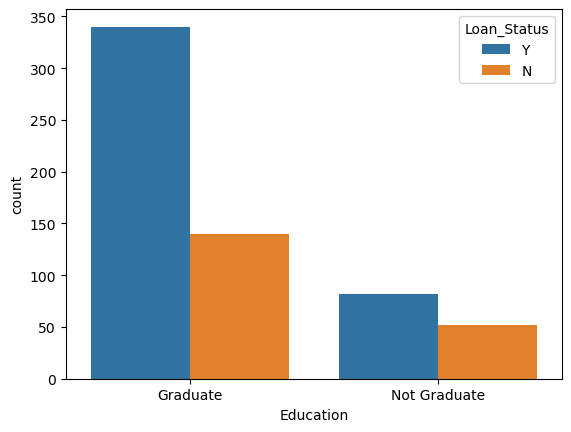

In [18]:
#DATA VISUALIZATION
#visualized the Loan status by Education
ax=sns.countplot(x='Education',hue='Loan_Status',data=df)
print(df['Education'].value_counts())

In [19]:
"""From above observation we can say the approval of loan of graduate applicants are more than the Non Graduate applicants."""

'From above observation we can say the approval of loan of graduate applicants are more than the Non Graduate applicants.'

Married
Yes    401
No     213
Name: count, dtype: int64


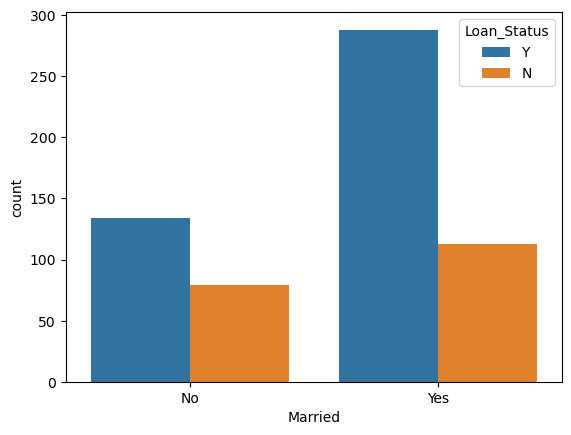

In [20]:
#visualized the Loan status by Marriage status
ax=sns.countplot(x='Married',hue='Loan_Status',data=df)
print(df['Married'].value_counts())

In [21]:
"""From above observation we can say the approval of loan of Married applicants are more than the Non married applicants."""

'From above observation we can say the approval of loan of Married applicants are more than the Non married applicants.'

Gender
Male      502
Female    112
Name: count, dtype: int64


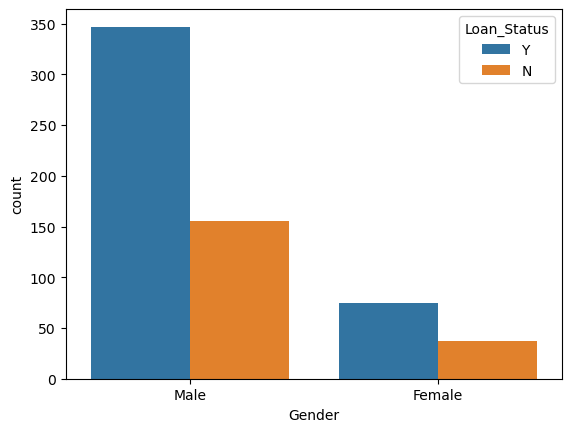

In [22]:
#visualized the Loan status by Gender
ax=sns.countplot(x='Gender',hue='Loan_Status',data=df)
print(df['Gender'].value_counts())

In [23]:
"""Here we can see the More Male applicants have been approved for loan than the Female applicants."""

'Here we can see the More Male applicants have been approved for loan than the Female applicants.'

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


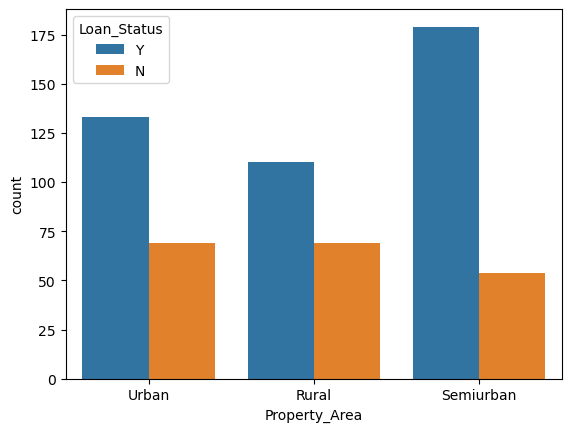

In [24]:
#visualized the Loan status by Property area
ax=sns.countplot(x='Property_Area',hue='Loan_Status',data=df)
print(df['Property_Area'].value_counts())

In [25]:
"""From above observation, in semiurban area's applicant are most approved for loan than other area's. Rural area's applicant
is lesser approved for loan."""

"From above observation, in semiurban area's applicant are most approved for loan than other area's. Rural area's applicant\nis lesser approved for loan."

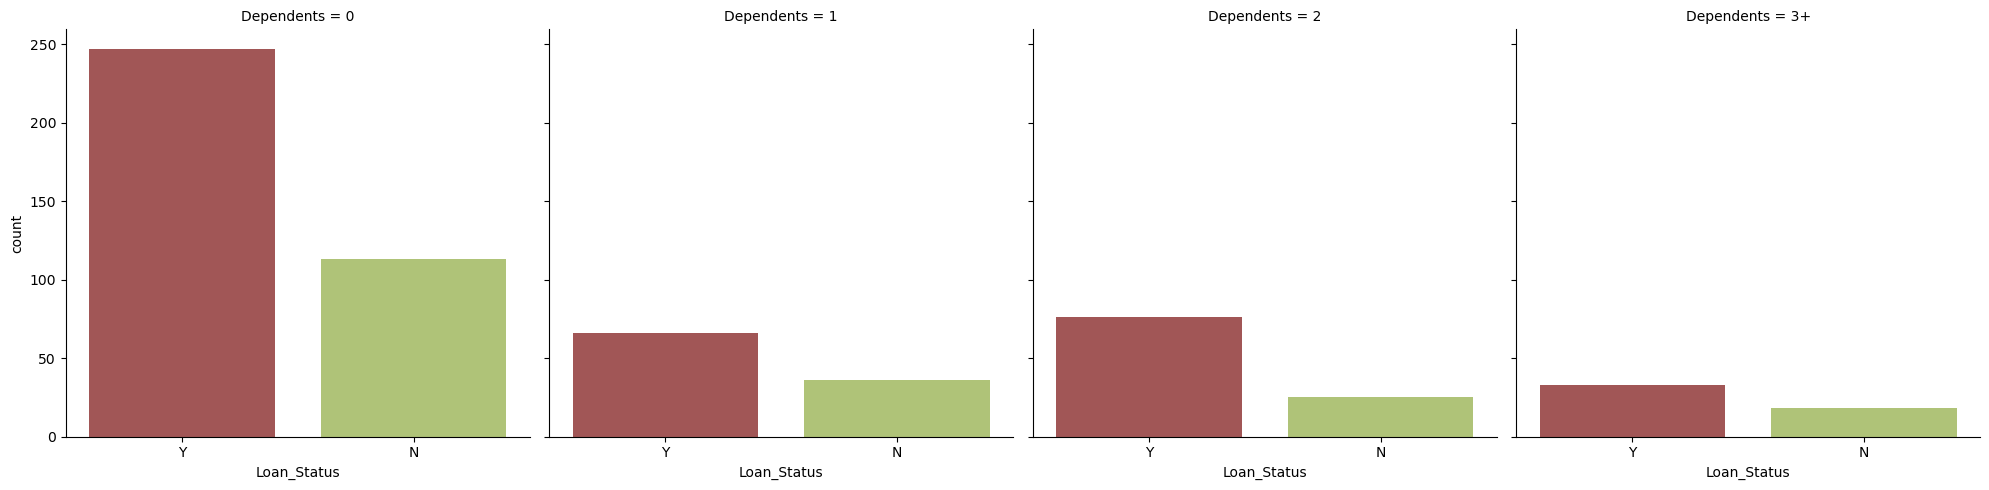

In [26]:
#checking Loan Status and dependents
sns.catplot(x="Loan_Status",col="Dependents",data=df,kind="count",palette='tab20b_r')

In [27]:
"""From above observation we can say, whose applicants have dependents 0 they approved for loan more than the 
others dependents.and The applicant whoes dependents are 3+ has very less approval for loan."""

'From above observation we can say, whose applicants have dependents 0 they approved for loan more than the \nothers dependents.and The applicant whoes dependents are 3+ has very less approval for loan.'

In [28]:
#separating numerical and categorical columns

#checking for categorical column

cat=list(df.select_dtypes(include='object'))
print("Categorical columns: ",cat)
print("\n")

#checking for numerical columns
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num.append(i)
print("numerical columns: ",num)
print("\n")

Categorical columns:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


numerical columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




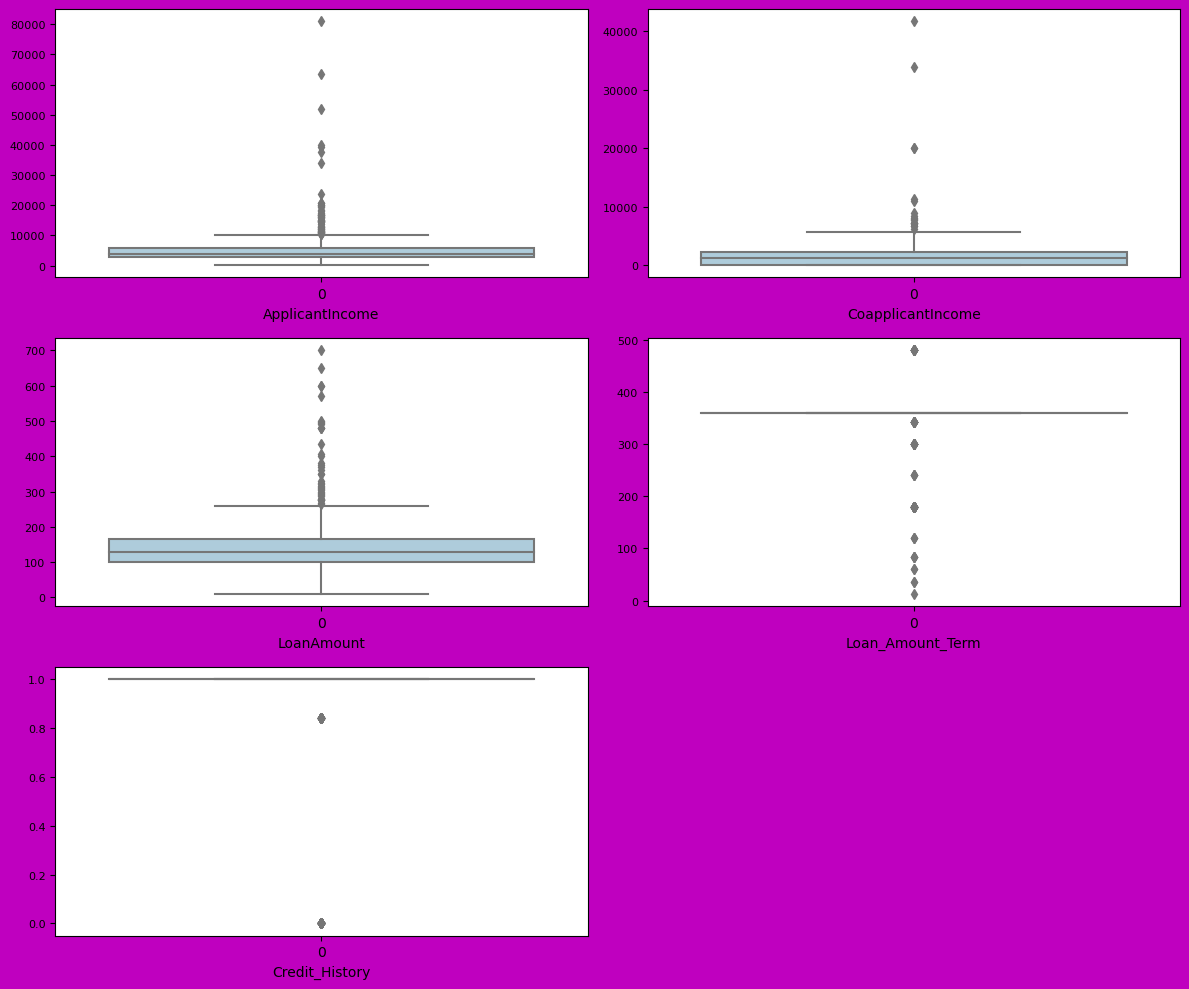

In [29]:
#checking the outliers using boxplot
plt.figure(figsize=(12,10),facecolor="m")
plotnumber=1
for col in num:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[col],palette="Paired")
        plt.xlabel(col,fontsize=10)
        plt.yticks(rotation=0,fontsize=8)
    plotnumber+=1
plt.tight_layout()

In [30]:
"""From above observations outliers are present in all columns.Using Zscore and IQR technique we can deal with outliers."""

'From above observations outliers are present in all columns.Using Zscore and IQR technique we can deal with outliers.'

In [31]:
from scipy.stats import zscore
z_score=zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [32]:
#after removing outliers
df.shape

(577, 13)

In [33]:
"""Now, Dataset contains 577 rows with 13 columns"""

'Now, Dataset contains 577 rows with 13 columns'

In [34]:
#encoding categorical cols using LabelEncoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lab_enc.fit_transform(df[i].values.reshape(-1,1))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,572,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,573,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,574,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,575,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


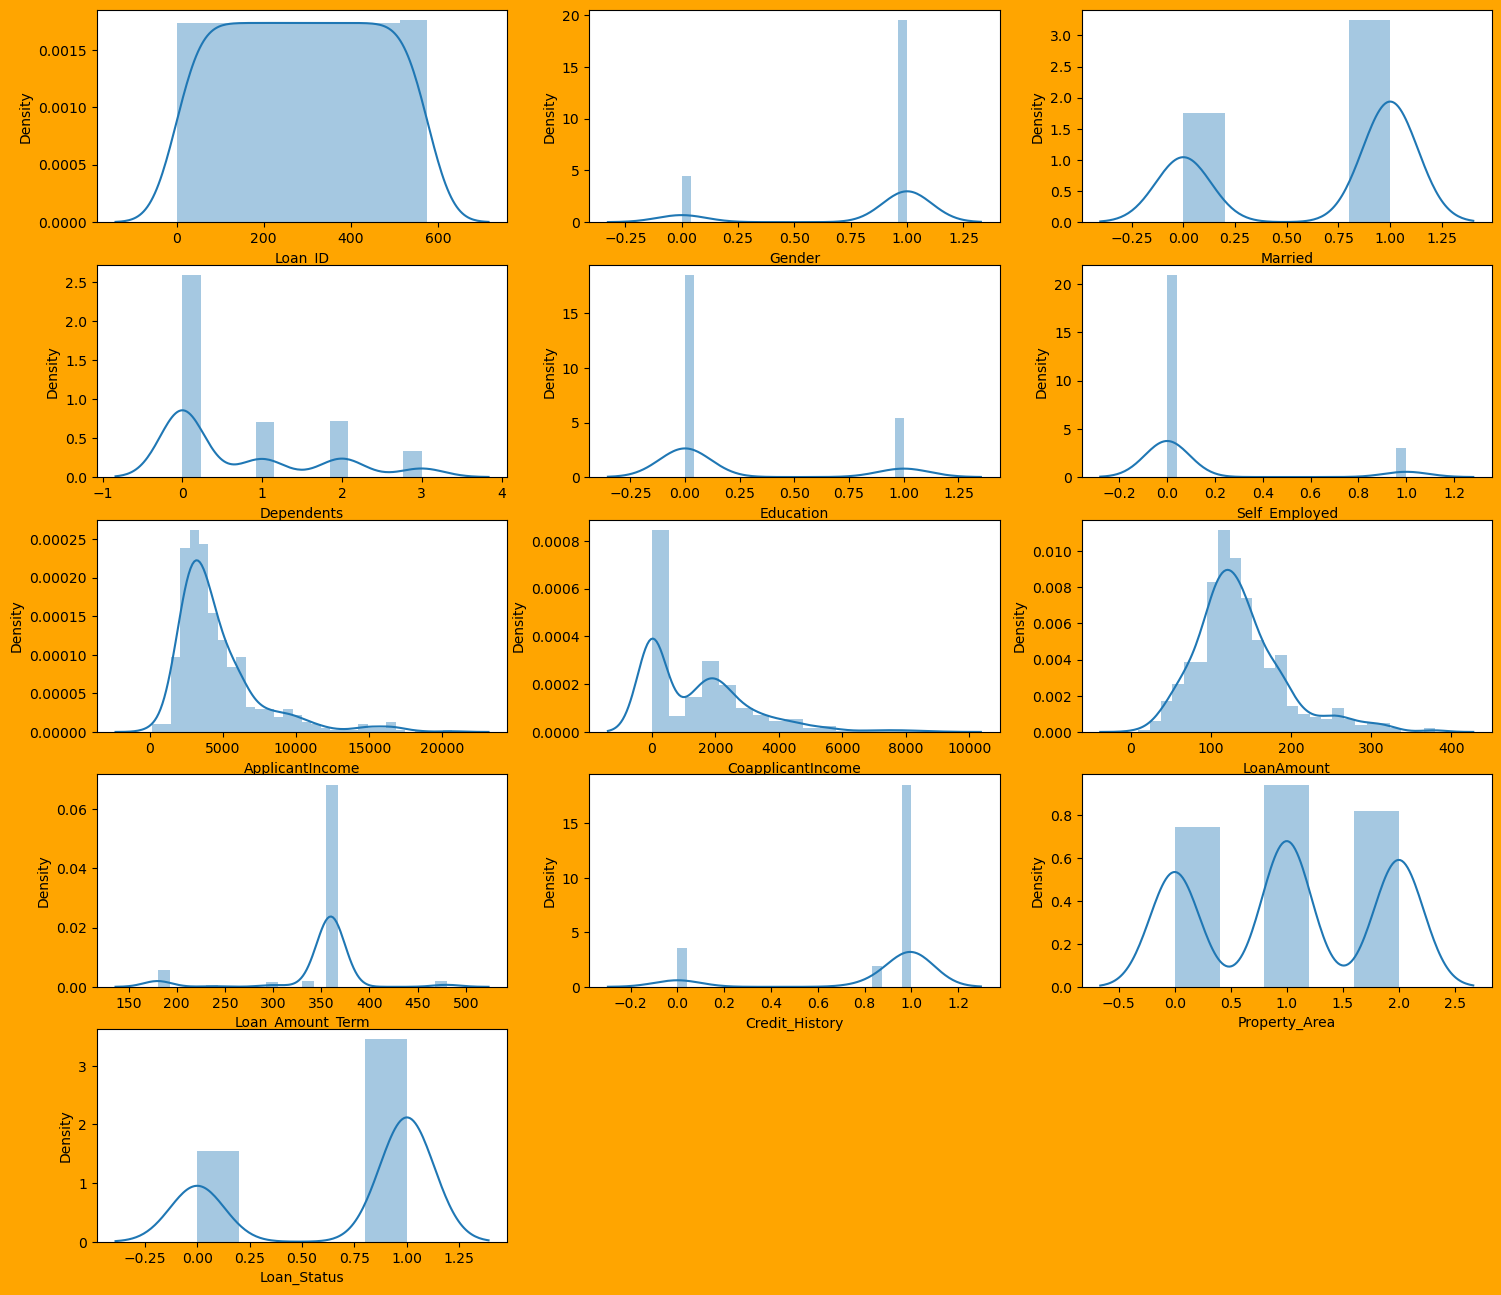

In [35]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='orange')
p=1
for col in df:
    if p<=13:
        ax=plt.subplot(5,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [36]:
df.skew()

Loan_ID              0.000000
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [37]:
"""Here we can see the Skewness present in all columns except married,property_area and loan status. Using cube root method
we can remove skewness in numerical columns only."""

'Here we can see the Skewness present in all columns except married,property_area and loan status. Using cube root method\nwe can remove skewness in numerical columns only.'

In [38]:
#Using cube root method we can remove skewness
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])
df['Loan_Amount_Term']=np.cbrt(df['Loan_Amount_Term'])
df['Credit_History']=np.cbrt(df['Credit_History'])

In [39]:
#again checking skewness
df.skew()

Loan_ID              0.000000
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.557136
Credit_History      -1.968907
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [40]:
#dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [41]:
df.shape

(577, 12)

In [42]:
#checking the correlation between features and target
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.049555,0.230714,0.173387,-0.104142,0.014386,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.018391,0.320626,0.182267,-0.124329,0.017250,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.100853,-0.006521,0.131665,-0.084528,-0.019181,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.178728,0.030281,-0.125819,-0.099780,-0.077343,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.230846,-0.078584,0.117411,-0.026855,-0.015892,-0.028253,-0.026525
ApplicantIncome,0.049555,-0.018391,0.100853,-0.178728,0.230846,1.000000,-0.343626,0.441357,-0.057324,0.035956,-0.012177,-0.004722
CoapplicantIncome,0.230714,0.320626,-0.006521,0.030281,-0.078584,-0.343626,1.000000,0.228319,-0.013641,-0.000298,-0.081866,0.071908
LoanAmount,0.173387,0.182267,0.131665,-0.125819,0.117411,0.441357,0.228319,1.000000,0.054975,-0.005608,-0.094665,-0.028730
Loan_Amount_Term,-0.104142,-0.124329,-0.084528,-0.099780,-0.026855,-0.057324,-0.013641,0.054975,1.000000,0.038262,-0.064844,-0.008652
Credit_History,0.014386,0.017250,-0.019181,-0.077343,-0.015892,0.035956,-0.000298,-0.005608,0.038262,1.000000,-0.008706,0.562167


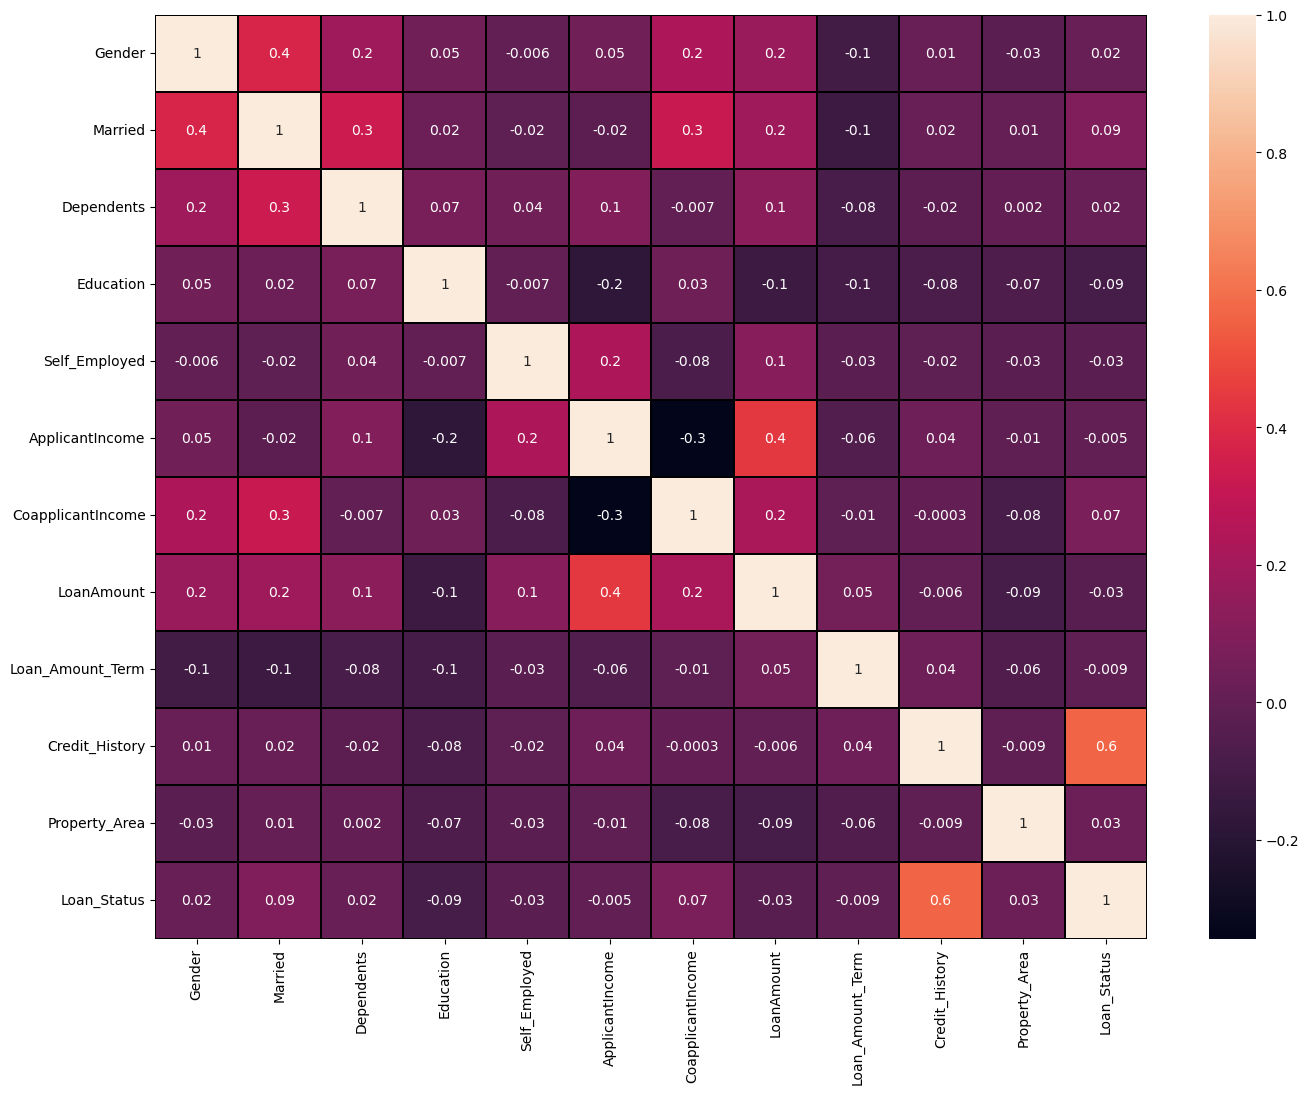

In [43]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),linewidths=0.2,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [44]:
"""From above observation married,coapplicantincome are positively correlated to target i.e.loan_status and credit history 
is highly positively related . """

'From above observation married,coapplicantincome are positively correlated to target i.e.loan_status and credit history \nis highly positively related . '

In [45]:
#We can observe the positive and negative correlated features with the target
cor['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.562167
Married              0.089026
CoapplicantIncome    0.071908
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.004722
Loan_Amount_Term    -0.008652
Self_Employed       -0.026525
LoanAmount          -0.028730
Education           -0.092658
Name: Loan_Status, dtype: float64

In [46]:
#separating features and label 
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [47]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.622825,-1.093504,0.318405,0.258681,0.432527,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.157351,0.596681,-0.012836,0.258681,0.432527,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.566533,-1.093504,-1.445145,0.258681,0.432527,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.798730,0.868268,-0.166705,0.258681,0.432527,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.673686,-1.093504,0.224069,0.258681,0.432527,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.620151,-1.093504,-1.302297,0.258681,0.432527,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,-0.040329,-1.093504,-2.336409,-3.363963,0.432527,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.298514,-0.177556,1.830577,0.258681,0.432527,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.161699,-1.093504,0.960923,0.258681,0.432527,1.227472


In [48]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.219455,Gender
1,1.401770,Married
2,1.170753,Dependents
3,1.072897,Education
4,1.060625,Self_Employed
5,1.801987,ApplicantIncome
6,1.600235,CoapplicantIncome
7,1.618743,LoanAmount
8,1.059788,Loan_Amount_Term
9,1.011245,Credit_History


In [49]:
"""By checking VIF values we can see the No multicollinarity problem. """

'By checking VIF values we can see the No multicollinarity problem. '

In [50]:
y.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

In [51]:
"'Here we can see that the data is not balanced,SO we will balance the data using SMOTE  method'"

"'Here we can see that the data is not balanced,SO we will balance the data using SMOTE  method'"

In [52]:
#OVERSAMPLING
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [53]:
#checking value count of target col
y.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

In [54]:
y1.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

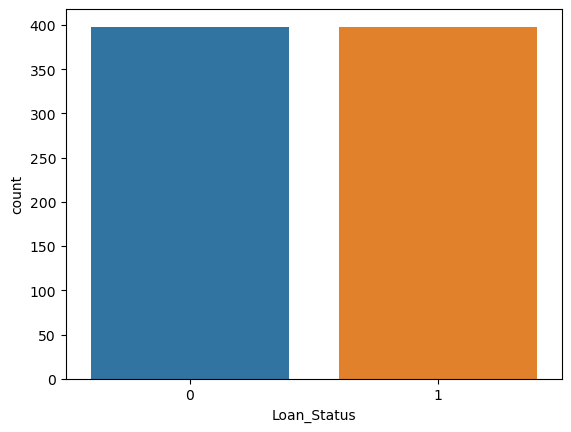

In [55]:
"""Now,we can see the data is balanced"""
#checking the count of Loan Status
sns.countplot(data=df,x=y1)
plt.show()

In [57]:
#split into train test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=39)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n----------------Train Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n----------------Test Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n The Classification Report\n', classification_report(y_test,pred,digits=2))

In [59]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 83.68%


 The Classification Report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       116
           1       0.83      0.86      0.84       123

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



In [61]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [62]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 74.33%

----------------Test Result------------------

Accuracy Score: 72.38%


 The Classification Report
               precision    recall  f1-score   support

           0       0.89      0.49      0.63       116
           1       0.66      0.94      0.78       123

    accuracy                           0.72       239
   macro avg       0.78      0.72      0.71       239
weighted avg       0.77      0.72      0.71       239



In [63]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [64]:
metric_score(ETC,x_train,x_test,y_train,y_test,train=True)
metric_score(ETC,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 83.68%


 The Classification Report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       116
           1       0.83      0.85      0.84       123

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



In [65]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [66]:
metric_score(GBC,x_train,x_test,y_train,y_test,train=True)
metric_score(GBC,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 91.74%

----------------Test Result------------------

Accuracy Score: 79.50%


 The Classification Report
               precision    recall  f1-score   support

           0       0.87      0.68      0.76       116
           1       0.75      0.90      0.82       123

    accuracy                           0.79       239
   macro avg       0.81      0.79      0.79       239
weighted avg       0.81      0.79      0.79       239



In [67]:
#..........CROSS VALIDATION SCORE........
from sklearn.model_selection import cross_val_score

In [68]:
#checking cv score for Random Forest Classifier
score=cross_val_score(random_clf,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=random_clf.predict(x_test)
acc_score1=accuracy_score(y_test,pred)
acc_score1

print("Difference between Accuracy Score and Cross Validation Score:",acc_score1-score.mean())

[0.80172414 0.77586207 0.77391304 0.82608696 0.8173913 ]
0.7989955022488756
Difference between Accuracy Score and Cross Validation Score: 0.03782458143313272


In [69]:
#checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=LR.predict(x_test)
acc_score2=accuracy_score(y_test,pred)
acc_score2

print("Difference between Accuracy Score and Cross Validation Score:",acc_score2-score.mean())

[0.81034483 0.79310345 0.79130435 0.86086957 0.82608696]
0.8163418290854573
Difference between Accuracy Score and Cross Validation Score: -0.09249245670052009


In [71]:
#checking cv score for Gradient Boosting Classifier
score=cross_val_score(GBC,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=GBC.predict(x_test)
acc_score3=accuracy_score(y_test,pred)
acc_score3

print("Difference between Accuracy Score and Cross Validation Score:",acc_score3-score.mean())

[0.77586207 0.75       0.7826087  0.80869565 0.83478261]
0.7903898050974513
Difference between Accuracy Score and Cross Validation Score: 0.004589274400456644


In [72]:
#checking cv score for Extra Trees Classifier
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=ETC.predict(x_test)
acc_score4=accuracy_score(y_test,pred)
acc_score4

print("Difference between Accuracy Score and Cross Validation Score:",acc_score4-score.mean())

[0.76724138 0.77586207 0.7826087  0.79130435 0.77391304]
0.7781859070464767
Difference between Accuracy Score and Cross Validation Score: 0.05863417663553161


In [83]:
"""Gradient Boosting Classifier is our best model as the difference between accuracy score and cross 
validation score is least

...............Gradient Boosting Classifier IS OUR BEST MODEL......"""

'Gradient Boosting Classifier is our best model as the difference between accuracy score and cross \nvalidation score is least\n\n...............Gradient Boosting Classifier IS OUR BEST MODEL......'

In [77]:
#Hyper parameter tunning
from sklearn.model_selection import GridSearchCV

param= {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
       }


gscv=GridSearchCV(GBC,param_grid=param,cv=5,verbose=True)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=True)

In [78]:
gscv.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}

In [81]:
model=GradientBoostingClassifier(max_depth=7,learning_rate=0.01,n_estimators=200)

In [82]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.58995815899581


In [84]:
#saving model
import joblib
joblib.dump(model,"loan_status.pkl")

['loan_status.pkl']

In [85]:
model=joblib.load("loan_status.pkl")
prediction=model.predict(x_test)
prediction

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [86]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,0,1
4,0,0
...,...,...
234,1,1
235,0,0
236,0,0
237,0,0


In [ ]:
>>Gradient Boosting Classifier is our best model as the difference between accuracy score and cross 
  validation score is least.
>>The best accuracy score is 81.58% for prediction of Applicants approval of Loan Status.